In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\gayat\Downloads\imdb\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df['sentiment']=df['sentiment'].map({'positive':1,"negative":0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=42)
vocab_size=10000
max_length=200
oov_token="<OOV>"

In [5]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(xtrain)

xtrain_seq=tokenizer.texts_to_sequences(xtrain)
xtest_seq=tokenizer.texts_to_sequences(xtest)

xtrain_pad=pad_sequences(xtrain_seq,maxlen=max_length,padding='post',truncating='post')
xtest_pad=pad_sequences(xtest_seq,maxlen=max_length,padding='post',truncating='post')

In [6]:
model=Sequential([
Embedding(vocab_size,128,input_length=max_length),
LSTM(64,return_sequences=True),
LSTM(32),
Dropout(0.5),
Dense(32,activation='relu'),
Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
history=model.fit(xtrain_pad,ytrain,epochs=20,batch_size=32,validation_data=(xtest_pad,ytest))

model.summary()

C:\Users\gayat\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 307s 240ms/step - accuracy: 0.5400 - loss: 0.6831 - val_accuracy: 0.7327 - val_loss: 0.5705
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 320s 238ms/step - accuracy: 0.6365 - loss: 0.6275 - val_accuracy: 0.8153 - val_loss: 0.4312
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 289s 231ms/step - accuracy: 0.8338 - loss: 0.4182 - val_accuracy: 0.8696 - val_loss: 0.3260
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 294s 235ms/step - accuracy: 0.8953 - loss: 0.2780 - val_accuracy: 0.8795 - val_loss: 0.2957
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 328s 240ms/step - accuracy: 0.9189 - loss: 0.2186 - val_accuracy: 0.8739 - val_loss: 0.2917
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 286s 229ms/step - accuracy: 0.9512 - loss: 0.1573 - val_accuracy: 0.8818 - val_loss: 0.3077
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2769s 250ms/step - accuracy: 0.9656 - loss: 0.1150 - val_accuracy: 0.8759 - val_loss: 0.3484
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 373s 298ms/step - a

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 200, 128)              │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (32, 200, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (32, 32)                    │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 32)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 32)                    │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,028,741 (15.37 MB)

 Trainable params: 1,342,913 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,685,828 (10.25 MB)

In [7]:
ypred_probab=model.predict(xtest_pad)
ypred=(ypred_probab>=0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step


accuracy: 0.8665
classification report:               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.87      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

confusion matrix: Axes(0.125,0.11;0.62x0.77)


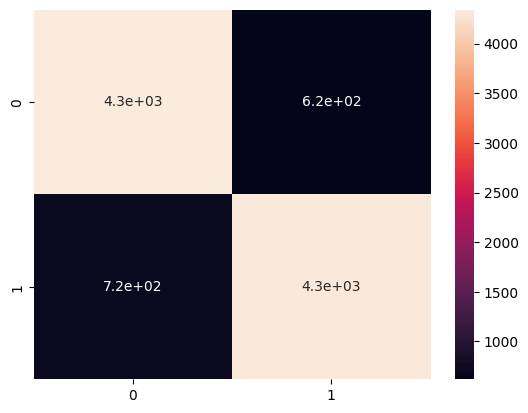

In [12]:
accuracy=accuracy_score(ytest,ypred)
report = classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"accuracy: {accuracy}")
print(f"classification report: {report}")
import seaborn as sns
print(f"confusion matrix: {sns.heatmap(cm,annot=True)}")

In [15]:
sample_review = "This movie was absolutely amazing, I loved every bit of it!"

# Step 1: Preprocess
sample_seq = tokenizer.texts_to_sequences([sample_review])
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')

# Step 2: Predict
prediction = model.predict(sample_pad)

# Step 3: Interpret
print(f"Confidence Score: {prediction[0][0]}")
if prediction[0][0] > 0.5:
    print("Predicted Sentiment: Positive 😊")
else:
    print("Predicted Sentiment: Negative 😞")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Confidence Score: 0.9985447525978088
Predicted Sentiment: Positive 😊


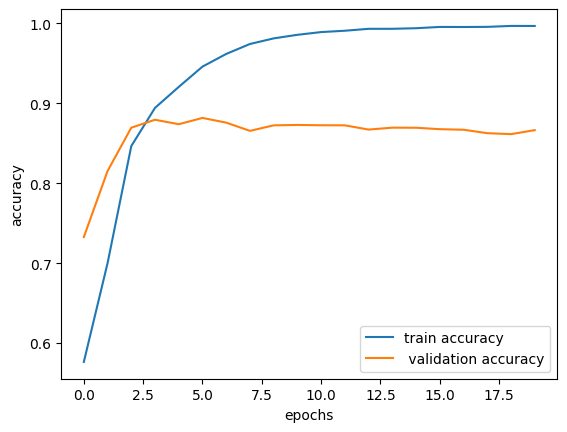

In [16]:
plt.plot(history.history['accuracy'],label="train accuracy")
plt.plot(history.history['val_accuracy'],label=" validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()